<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


##### Descriptive Statistics and Visualizations

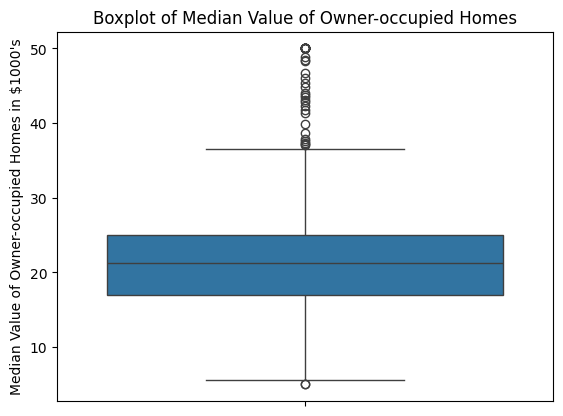

In [10]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("Boxplot of Median Value of Owner-occupied Homes")
pyplot.ylabel("Median Value of Owner-occupied Homes in $1000's")
pyplot.show()

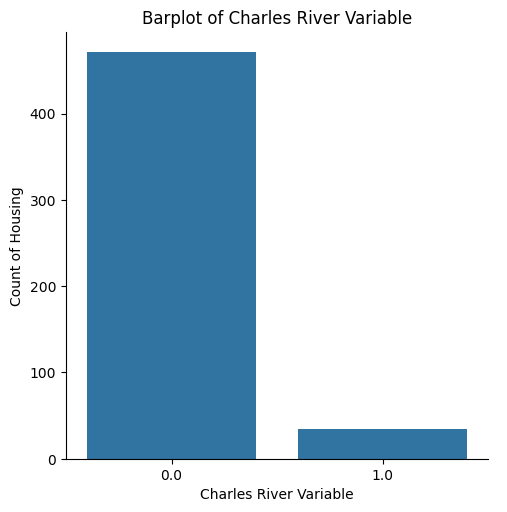

In [12]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title("Barplot of Charles River Variable")
pyplot.xlabel("Charles River Variable")
pyplot.ylabel("Count of Housing")
pyplot.show()

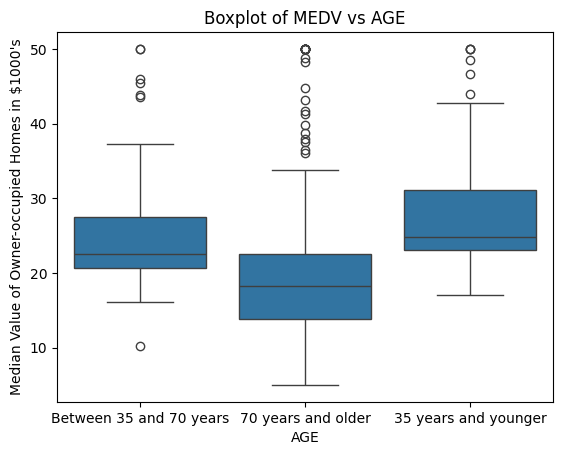

In [18]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
pyplot.title("Boxplot of MEDV vs AGE")
pyplot.xlabel("AGE")
pyplot.ylabel("Median Value of Owner-occupied Homes in $1000's")
pyplot.show()

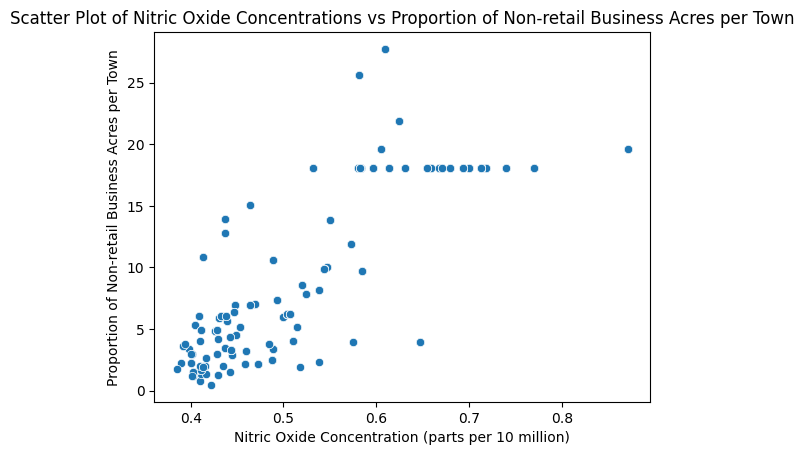

In [19]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-retail Business Acres per Town")
pyplot.xlabel("Nitric Oxide Concentration (parts per 10 million)")
pyplot.ylabel("Proportion of Non-retail Business Acres per Town")
pyplot.show()

###### There is a positive correlation between Proportion of Non-retail Business Acres per Town and Nitric Oxide Concentration. In other words, the higher the Proportion of Non-retail Business Acres per Town, the higher the Nitric Oxide Concentration is.

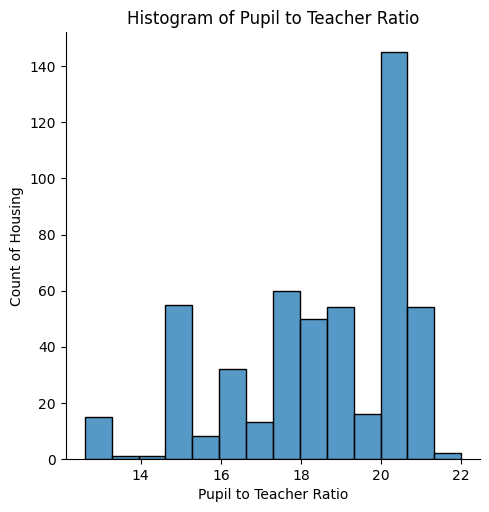

In [20]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)
pyplot.title("Histogram of Pupil to Teacher Ratio")
pyplot.xlabel("Pupil to Teacher Ratio")
pyplot.ylabel("Count of Housing")
pyplot.show()

##### Hypothesis Testing

##### Q1

Hypothesis:
*   $H\_0: µ\_1 = µ\_2$ ("There is no difference in median values of houses between those bounded by the Charles river and those not bounded by the Charles river.")
*   $H\_1: µ\_1 ≠ µ\_2$ ("There is a difference in median values of houses between those bounded by the Charles river and those not bounded by the Charles river.")

In [22]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [23]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value of 0.05, we reject the null hypothesis as there is evidence that there is statistical difference in median values of houses between those bounded by the Charles river and those not bounded by the Charles river.

##### Q2

Hypothesis:
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (The three population means are equal.)
*   $H\_1:$ (At least one of the means differ.)

In [25]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [26]:
QA = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
QB = boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV']
QC = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(QA, QB, QC)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is significant evidence that at least one of the means differ.

##### Q3

Hypothesis:

*   $H\_0:$ Nitric oxide concentration is not correlated with proportion of non-retail business acres per town.
*   $H\_1:$ Nitric oxide concentration is correlated with proportion of non-retail business acres per town.

In [27]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between nitric oxide concentration and proportion of non-retail business acres per town.

##### Q4

Hypothesis:

*   $H\_0:$ Weighted distance to the five Boston employment centres is not correlated with median value of owner occupied homes.
*   $H\_1:$ Weighted distance to the five Boston employment centres is correlated with median value of owner occupied homes.

In [28]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        15:09:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p value is less than 0.05, there is evidence of correlation between weighted distance to the five Boston employment centres and median value of owner occupied homes. For every additional weighted distance to the five Boston employment centres, the median value of o